<img src="logo.png" alt="Logo IFNMG" width="200">
<h1 style="text-align:center;"> Tópicos em IC: Análise exploratória de dados.</h1>
<p>Equipe: David Jansen, Iarah Gonçalves de Almeida, Paulo Borges</p>

<h2>1) Introdução</h2>
<p> A análise de dados será feita sobre o 
<a href="http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29">Breast Cancer Wisconsin (Prognostic) Data Set.</a> A manipulação dos dados para análise será feita utilizando a linguagem Python no ambiente Jupyter.</p>

<h2>2) Informação dos Atributos </h2>

<p> 1) ID number </p>

<p> 2) Outcome (R = recur, N = nonrecur) </p>

<p> 3) Time (recurrence time if field 2 = R, disease-free time if field 2	= N) </p>

<p> 4-33) Ten real-valued features are computed for each cell nucleus: </p>

<ol>
    <li> radius (mean of distances from center to points on the perimeter) </li>
    <li> texture (standard deviation of gray-scale values) </li>
    <li> perimeter </li>
    <li> area </li>
	<li> smoothness (local variation in radius lengths) </li>
	<li> compactness (perimeter^2 / area - 1.0) </li>
	<li> concavity (severity of concave portions of the contour) </li>
	<li> concave points (number of concave portions of the contour) </li>
	<li> symmetry </li>
	<li> fractal dimension ("coastline approximation" - 1) </li>
</ol>

<p> Several of the papers listed above contain detailed descriptions of how these features are computed. </p>

<p>The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 4 is Mean Radius, field 14 is Radius SE, field 24 is Worst Radius. </p>

<p> Values for features 4-33 are recoded with four significant digits. <p>

<p> 34) Tumor size - diameter of the excised tumor in centimeters </p>
<p> 35) Lymph node status - number of positive axillary lymph nodes observed at time of surgery. </p>

<h2>3) Preparação do Ambiente Jupyter</h2>

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen

#URL onde se encontra a base de dados.
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'

#Nomeação das colunas.
names = ['id_number', 'outcome', 'time', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

#Leitura do arquivo para o formato csv.
wpbc = pd.read_csv(urlopen(UCI_data_URL), names=names)

#Mostrando resultado em forma de tabela (10 primeiros).
wpbc.head(10)

,id_number,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


<h2>4) Tratamento do Conjunto de Dados para análise</h2>

<p> O atributo 'outcome' está representado com um objeto string. Faremos um mapeamento do atributo para valores numéricos, onde N = 0.0 e R = 1.0. Isso ajuda na plotagem de gráficos e na aplicação de alguns modelos.</p>

<p> Algumas informações podem ser obtidadas através do arquivo <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names">wpbc.names</a>:</p>

<ul>
    <li> O atributo 'lymph_node_status' está ausente em 4 amostras.</li>
    <li> 151 amostras não apresentam recorrência('outcome' = 0), 47 apresentam recorrência('outcome' = 1).</li>
</ul>

<p> Dada a primeira informação na lista acima, iremos retirar essas 4 amostras de nossa análise.</p>

<p> As entradas da tabela serão passadas para o formato <b><i>float64</i></b>.<p>
    
<p> As colunas <b><i>id_number, time</i></b> serão removidas do nosso conjunto de dados por não se tratarem de informações relevantes em nossa análise.

In [37]:
# Mapeia a coluna 'outcome' para valores numéricos, 'R' de recur será 1, 'N' de nonrecur será 0
wpbc['outcome'] = wpbc['outcome'].map({'R':1.0, 'N':0.0})

# Retira os 4 valores null da coluna 'lymph_node_status'
wpbc = wpbc[wpbc['lymph_node_status'] != '?']

# Converte todo o dataframe para float64
wpbc = wpbc.astype('float64')

#Removendo colunas "id_number" e "time"
wpbc = wpbc.drop(columns=['id_number', 'time'])

# Reseta os indices para não ter falha dos valores retirados
wpbc.reset_index(inplace=False)

wpbc.head(10)

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,0.0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,0.0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
5,1.0,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0
7,1.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10.0
8,0.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1.0
9,0.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20.0
10,0.0,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0.0


<h2>5) Informações da tabela </h2>
<p> Podemos ter mais algumas informações estatísticas do conjunto de dados, usando a função <b><i>describe</i></b>. Informações dos tipos de dados, podem ser obtidos com a função <b><i>info</i></b>.</p>

In [38]:
wpbc.describe()

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.237113,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,0.426413,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,0.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,0.000000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,0.000000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,0.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,1.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [39]:
wpbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 33 columns):
outcome                    194 non-null float64
radius_mean                194 non-null float64
texture_mean               194 non-null float64
perimeter_mean             194 non-null float64
area_mean                  194 non-null float64
smoothness_mean            194 non-null float64
compactness_mean           194 non-null float64
concavity_mean             194 non-null float64
concave_points_mean        194 non-null float64
symmetry_mean              194 non-null float64
fractal_dimension_mean     194 non-null float64
radius_se                  194 non-null float64
texture_se                 194 non-null float64
perimeter_se               194 non-null float64
area_se                    194 non-null float64
smoothness_se              194 non-null float64
compactness_se             194 non-null float64
concavity_se               194 non-null float64
concave_points_se          194 

<h2>6) Exploração de Dados</h2>

<p>Em nosso <a href="https://github.com/DWalterJansen/topicosIC/blob/master/Equipe/Trabalho%20Intermedi%C3%A1rio/trabalho_intermediario.ipynb">trabalho intermediário</a>, analisamos apenas as caracteristicas de valor médio(_mean), tumor_size, e lymph_node_status para avaliar a influência na recorrência ou não recorrência do cancêr de mama. Os resultados lá obtidos, nos motivaram à apronfunar na análise. Nessa versão final do trabalho para a disciplina, iremos aumentar o número de características observadas e aplica-lás em alguns modelos de classificação.</p>

<h3>6.1) Floresta Aleatória com conjunto de treinamento e teste</h3>

<p>Iniciamos usando uma <b><i>RandomForestClassifier</i></b> aplicada ao nosso dataframe <b><i>wpbc</i></b>, onde usaremos as 32 caracterísicas para fazer a predição do valor na coluna <b><i>outcome</i></b>.

<h4>6.1.1) Procedimentos para classificação</h4>

<p>Primeiramente, vamos separar nossas colunas em dependentes e independentes. A divisão entre o conjunto de treinamento e teste será feito usando o algoritmo <b>K-Fold</b> que realiza o <i>split</i> no conjunto de dados.</p>

<h4>6.1.2) Treinamento do Modelo e Resultado do treinamento</h4>

<p>Depois de separarmos os conjuntos, podemos aplicar o treinamento. Em seguida, verificamos a precisão do modelo atráves da média dos resultados obtidos para cada <i>split</i>, o que nos diz quão frequente nosso classificador estará correto.</p>

<p>Durante a execução do algoritmo, guardamos sempre o melhor resultado de predição. Usaremos esse resultado para medir a importância das características para a predição.</p>

<h4>6.1.3) Importância das Variáveis:</h4>

<p>Uma outra importante funcionalidade da <b><i>RandomForestClassifier</i></b> é a possibilidade de exibirmos a importância das características para o modelo.</p>

##################################################
1 Iteração:
Precisão encontrada para 1º split: 0.7
Precisão encontrada para 2º split: 0.8
Precisão encontrada para 3º split: 0.65
Precisão encontrada para 4º split: 0.8
Precisão encontrada para 5º split: 0.9473684210526315
Precisão encontrada para 6º split: 0.631578947368421
Precisão encontrada para 7º split: 0.6842105263157895
Precisão encontrada para 8º split: 0.631578947368421
Precisão encontrada para 9º split: 0.7894736842105263
Precisão encontrada para 10º split: 0.9473684210526315
Resultados Atuais..

Precisão média para as 10 predições: 0.7581578947368421
Melhor resultado: 0.9473684210526315

Características ordenadas pela pontuação:
##################################################
2 Iteração:
Precisão encontrada para 1º split: 0.7
Precisão encontrada para 2º split: 0.8
Precisão encontrada para 3º split: 0.65
Precisão encontrada para 4º split: 0.75
Precisão encontrada para 5º split: 0.9473684210526315
Precisão encontrada para 

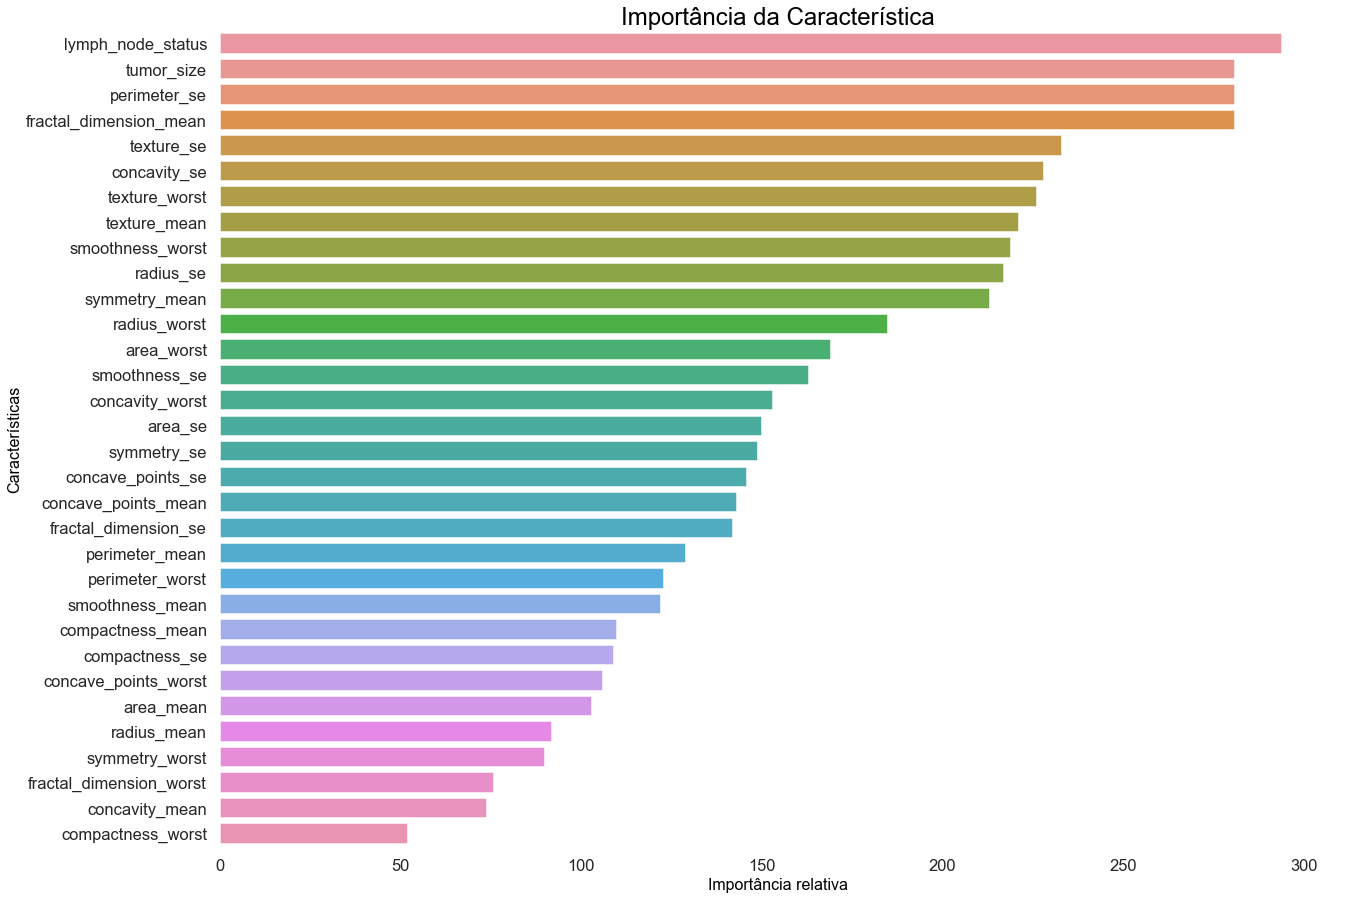

In [115]:
################################################################################
#6.1)

#Separa as colunas em dependentes e independentes

namesrfc = ['radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

X = wpbc[namesrfc]  # Características
y = wpbc['outcome']  # Rótulo


# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier
# Importa 'metrics' de 'sklearn'
from sklearn import metrics

# Cria um classificador gaussiano
clf = RandomForestClassifier(n_estimators=100)

# Importa o K-fold para separar entre treino e teste
from sklearn.model_selection import KFold

# Valor do K (número de divisões na base de dados)
kf = KFold(n_splits = 10)

size = len(namesrfc)
sum_features_importance = dict(zip(namesrfc, np.zeros(size)))
for n in range(10):
    print("##################################################\n%d Iteração:" %(n+1))
    best_precision = 0.0000
    sum_precisions = 0.0000

    ################################################################################
    # 6.1.1)
    i = 0
    for train_index, test_index in kf.split(X):
        i = i + 1 #contado de split
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treina o modelo usando o conjunto de treinamento
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Modelo de precisão, que diz quão frequente o classificador está correto
        precision = metrics.accuracy_score(y_test, y_pred)
        print("Precisão encontrada para %dº split: " %(i) ,end="")
        print(precision)
        sum_precisions = sum_precisions + precision
        if best_precision < precision:
            best_precision = precision
            clf_best = clf
            y_test_best = y_test
            y_pred_best = y_pred

    print("Resultados Atuais..")
    print("\nPrecisão média para as %d predições: " %i, end="")
    print(sum_precisions/i);
    print("Melhor resultado: ", end="")
    print(best_precision)

    ################################################################################
    # 6.1.3

    # Ordenação das as características importantes pela pontuação usando a iterção com a melhor precisão
    print("\nCaracterísticas ordenadas pela pontuação:")
    # O número dentro de round é o limite de casas decimais
    result = sorted(zip(map(lambda x: round(x, 6), clf_best.feature_importances_), namesrfc), reverse=True)

    for j in range(size):
        #sum_features_importance[result[j][1]] = sum_features_importance[result[j][1]] + result[j][0]
        sum_features_importance[result[j][1]] = sum_features_importance[result[j][1]] + (size-j)


features_importance = sorted(zip(sum_features_importance.values(), sum_features_importance.keys()), reverse=True)
# Criando dataframe com o resultado
df = pd.DataFrame(data=features_importance)
df = df.rename(index=str, columns={0: "importance", 1: "feature"})

import matplotlib.pyplot as plt
#Configurações para exibição do gráfico
sns.set_color_codes("dark")
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(20,15))
g = sns.barplot(x="importance", y="feature", data=df)
g.axes.set_title('Importância da Característica', fontsize=24,color="black",alpha=2)
g.set_xlabel("Importância relativa", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

<h3>6.2) Correlação</h3>

<p>Nossa base de dados possui muitas características, portando iremos tentar reduzir essa quantidade olhando para os atributos correlacionados.</p>

<p>Uma ferramenta que nos permite aprofundar um pouco mais na exploração da correlação de características é mapa de calor:</p>

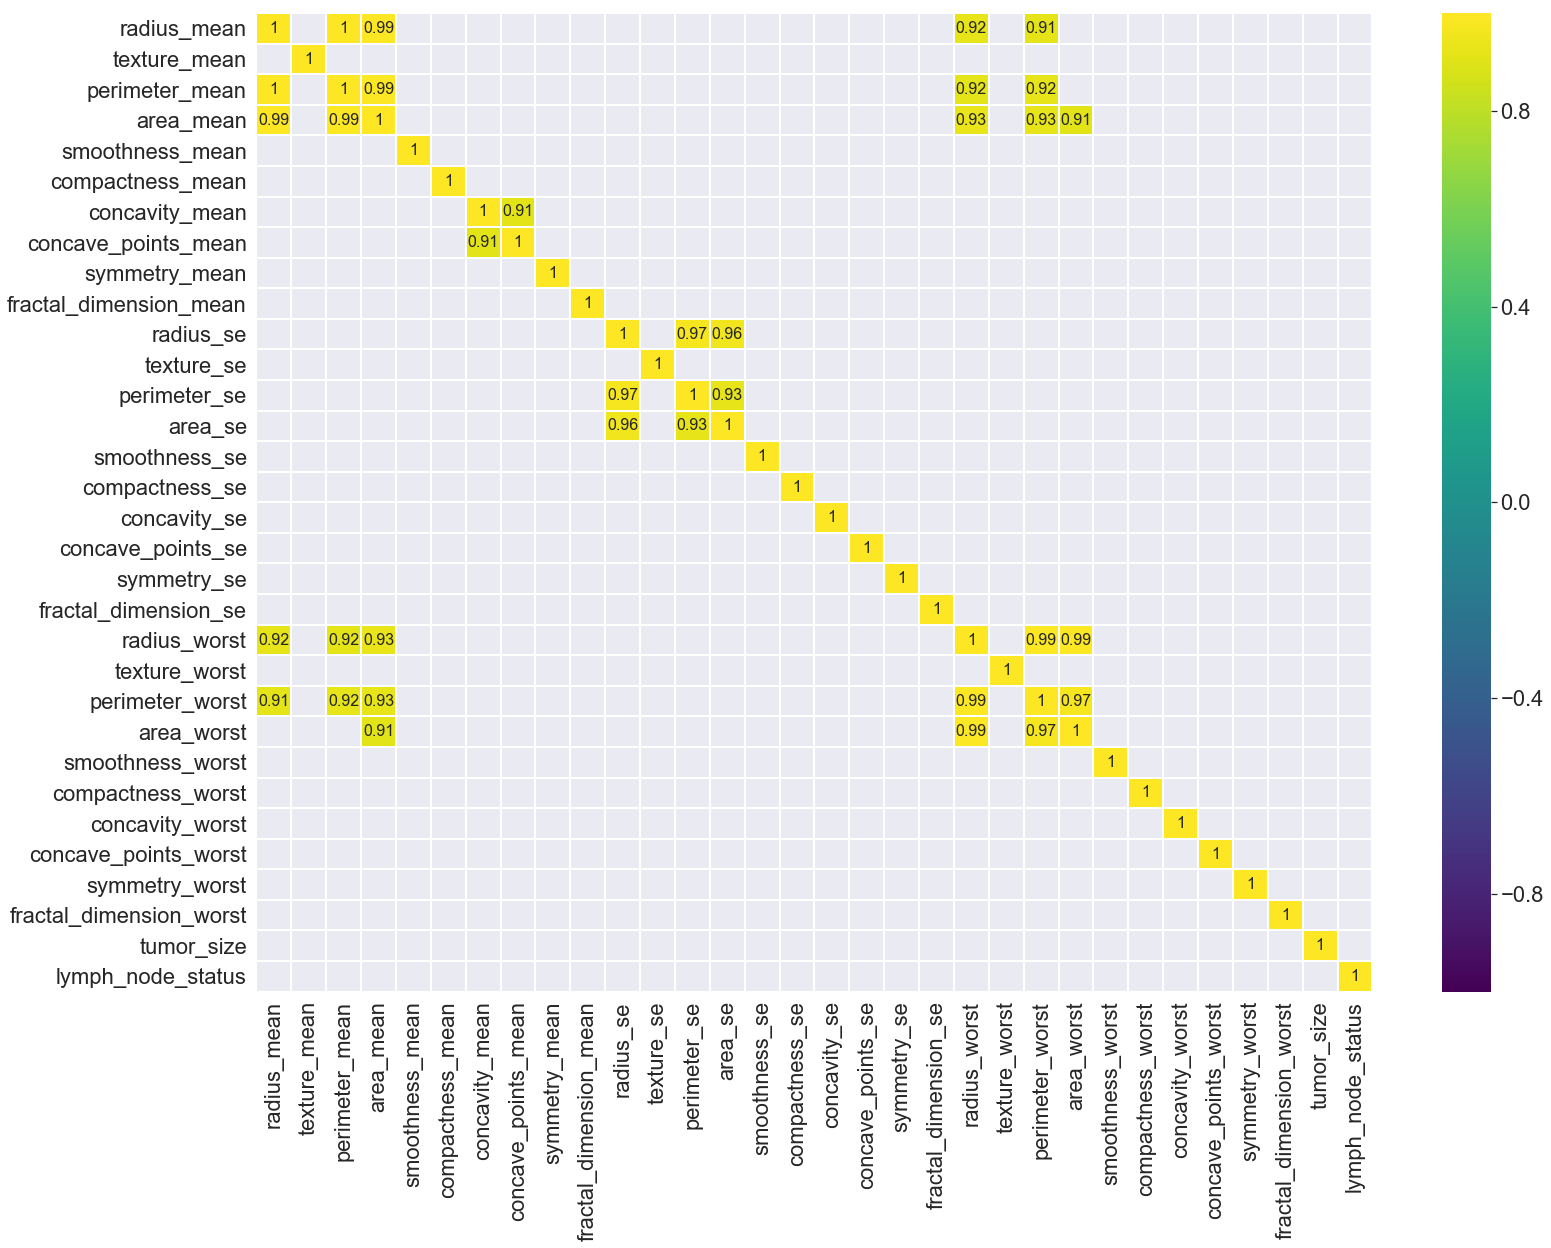

In [41]:
# Gerando a correlação das características
corr = wpbc.drop('outcome', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(25, 18))
sns.set_context("poster")
sns.set(font_scale=2.0)


# Exibindo as correlações maiores que 0.75 e menor que -0.75
c = sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 16}, square=False);

size = len(namesrfc)
coor_features = list();
data = (corr[(corr >= 0.9) | (corr <= -0.9)])
for i in range(0,size):
    for j in range(i):
        if (data.iloc[i,j] > 0):
            coor_features.append([namesrfc[i], namesrfc[j]])

In [99]:
sum_features_importance.values()

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

In [104]:
features_importance = sorted(zip(sum_features_importance.values(), sum_features_importance.keys()), reverse=True)

In [105]:
features_importance

[(0.39838299999999993, 'perimeter_se'),
 (0.39178300000000005, 'smoothness_worst'),
 (0.38621099999999997, 'tumor_size'),
 (0.371768, 'lymph_node_status'),
 (0.368922, 'concavity_se'),
 (0.36797599999999997, 'fractal_dimension_mean'),
 (0.36500800000000005, 'texture_worst'),
 (0.34965500000000005, 'radius_worst'),
 (0.348382, 'radius_se'),
 (0.34604599999999996, 'texture_mean'),
 (0.34006, 'texture_se'),
 (0.33683699999999994, 'symmetry_mean'),
 (0.320117, 'area_worst'),
 (0.30506400000000006, 'smoothness_mean'),
 (0.299021, 'symmetry_se'),
 (0.29583499999999996, 'perimeter_mean'),
 (0.29454700000000006, 'concave_points_se'),
 (0.294293, 'perimeter_worst'),
 (0.293203, 'concavity_worst'),
 (0.292299, 'concave_points_worst'),
 (0.287259, 'fractal_dimension_se'),
 (0.285891, 'area_mean'),
 (0.28221199999999996, 'smoothness_se'),
 (0.281223, 'symmetry_worst'),
 (0.27892, 'concave_points_mean'),
 (0.274469, 'compactness_se'),
 (0.27001000000000003, 'concavity_mean'),
 (0.266807, 'area_se')